# WEB SCRAPING ABC 

In [1]:
## Getting the working directory ##
import os
os.getcwd()

'C:\\Users\\njeri\\Documents\\Masters\\Personalisation for Public Media\\Assignments\\Assignment 2'

In [27]:
from tqdm import tqdm

import glob
from bs4 import BeautifulSoup
files = glob.glob('Data/*/*.html') #/ set the folder; * get all; .html files with that ending 

data = []

for file in tqdm(files):
    if './data/show' not in file:
        soup = BeautifulSoup(open(file, encoding='utf-8'), 'html.parser')
        article = {}
        #print(file)
    
    # extract the data from each file
    if soup.find('meta',  attrs={'name': 'title'}):
      title = soup.find('meta',  attrs={'name': 'title'})['content']
    else:
      title = ''
    
    if soup.find('meta',  attrs={'property': 'og:description'}):
      description = soup.find('meta',  attrs={'property': 'og:description'})['content']
    else:
      description = ''
    
    if soup.find('meta',  attrs={'property': 'og:image'}):
      image = soup.find('meta',  attrs={'property': 'og:image'})['content']
    else:
      image = ''
    
    if soup.find('meta',  attrs={'name': 'description'}):
      description_2 = soup.find('meta',  attrs={'name': 'description'})['content']
      #description_2 = year[year.find("(")+1:year.find(")")]  
    else:
      description_2 = ''
    
    if soup.find('meta',  attrs={'property': 'og:title'}):
      series = soup.find('meta',  attrs={'property': 'og:title'})['content']
    else:
      series = ''
    
    if soup.find(class_= 'iv-_M7S5 iv-lPN_l iv-wYJ_n iv-fFoNc'):
      director = soup.find(class_='iv-_M7S5 iv-lPN_l iv-wYJ_n iv-fFoNc').get_text()
    else:
      director = ''
    
    #if soup.find_all(class_= 'iv-_M7S5 iv-lPN_l iv-wYJ_n iv-fFoNc')[1]:
      #cast = soup.find_all(class_='iv-_M7S5 iv-lPN_l iv-wYJ_n iv-fFoNc')[1].get_text()
    #else:
      #cast = ''
    
    if soup.find_all(class_= 'iv-FlezZ iv-uiNJd iv-GUl_W iv-fFoNc iv-_ePu3 iv-JNaj_'):
      empty = soup.find_all(class_='iv-FlezZ iv-uiNJd iv-GUl_W iv-fFoNc iv-_ePu3 iv-JNaj_')
      Features =[]
      for i in empty:
        text = i.get_text()   
        Features.append(text)
        #Features = ' '.join(Features)
    else:
      empty = ''
    
    category = file.split('\\')[1]
    
    article = {
      'title': title,
      'description': description,
      'image': image,
      'description_2': description_2,
      'director': director,
      'Features': Features[2:],
      'Category': category,
      'Series' : series
    }
    
    # append the article to the data
    data.append(article)

100%|██████████| 9085/9085 [05:36<00:00, 27.03it/s]


In [28]:
## How many videos do we have to set the plataform? ##
len(data) #should be 1,538

9085

In [29]:
## An example ##
data[9080]

{'title': 'QI',
 'description': 'Join Sandi Toksvig, Alan Davies, Cally Beaton, Jamali Maddix and Josh Widdicombe for a look at animals which begin with the letter S.',
 'image': 'https://cdn.iview.abc.net.au/thumbs/i/zw/ZW3211A009S00_6226bd190e685.jpg',
 'description_2': "Sandi Toksvig hosts the return of the quiz with a difference, in which the questions are so difficult points are awarded for the answers she finds most interesting. This time, it's the letter 'S' under scrutiny.",
 'director': 'Sandi Toksvig',
 'Features': [],
 'Category': 'panel-discussion',
 'Series': "QI: Series 20 Episode 9 'S' Animals"}

In [30]:
import pandas as pd
import numpy as np

## Set a dataframe ##
df_ABC = pd.DataFrame(data)
df_ABC.head(10)

,title,description,image,description_2,director,Features,Category,Series
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","[COMEDY, DRAMA, MOVIES]",comedy,100 Bloody Acres
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",[INDIGENOUS],comedy,8MMM
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",[SCIENCE],comedy,About Sex
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,[MOVIES],comedy,Absolutely Anything
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"[COMEDY, DRAMA, MOVIES]",comedy,Accidents Happen
5,Adam Hills: The Last Leg,"Adam, Josh and Alex are back for a brand new s...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","[COMEDY, PANEL & DISCUSSION]",comedy,Adam Hills: The Last Leg
6,Aftertaste,"Having burned all his bridges, celebrity chef ...",https://cdn.iview.abc.net.au/thumbs/i/co/CO190...,"Having burned all his bridges, celebrity chef ...","Erik Thomson, Rachel Griffiths, Natalie Abbott",[],comedy,Aftertaste
7,All My Friends Are Racist,"In a survival-of-the-fiercest, two twenty-some...",https://cdn.iview.abc.net.au/thumbs/i/ip/IP200...,"In a survival-of-the-fiercest, two twenty-some...",Bjorn Stewart,[COMEDY],comedy,All My Friends Are Racist
8,Anh's Brush With Fame,Anh Do paints some of Australia's most famous ...,https://cdn.iview.abc.net.au/thumbs/i/do/DO203...,Anh Do paints some of Australia's most famous ...,Anh Do,[DOCUMENTARY],comedy,Anh's Brush With Fame
9,Archer,Archer and his co-pilot Pam navigate quicksand...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW194...,Archer and his co-pilot Pam navigate quicksand...,"Jessica Walter, Aisha Tyler, H. Jon Benjamin",[],comedy,Archer


In [31]:
## Identify blanks in the column title ##
df_ABC.iloc[df_ABC[df_ABC['title'] == ''].index]

,title,description,image,description_2,director,Features,Category,Series
718,,,,,,[COMEDY],comedy,
7912,,,,,,[],news,


In [32]:
## Replace blanks with nan ##
df_ABC = df_ABC.replace(r'^\s*$', np.nan, regex=True)
df_ABC.dropna(thresh=3,inplace=True) #drop rows with more than 3 blanks 
df_ABC.reset_index(drop=True, inplace=True) #reset the index 
df_ABC

,title,description,image,description_2,director,Features,Category,Series
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","[COMEDY, DRAMA, MOVIES]",comedy,100 Bloody Acres
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",[INDIGENOUS],comedy,8MMM
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",[SCIENCE],comedy,About Sex
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,[MOVIES],comedy,Absolutely Anything
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"[COMEDY, DRAMA, MOVIES]",comedy,Accidents Happen
...,...,...,...,...,...,...,...,...
9078,QI,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,[],panel-discussion,QI: Series 20 Episode 9 'S' Animals
9079,Adam Hills: The Last Leg,"Hannah Gadsby and Tom Allen join Adam Hills, J...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","[COMEDY, PANEL & DISCUSSION]",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 6 ...
9080,Adam Hills: The Last Leg,"Adam Hills, Josh Widdicombe and Alex Brooker a...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","[COMEDY, PANEL & DISCUSSION]",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 7 ...
9081,Adam Hills: The Last Leg,"Fast-tracked from the UK, Adam Hills, Josh Wid...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","[COMEDY, PANEL & DISCUSSION]",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 8 ...


In [33]:
## How many nulls for column? ##
df_ABC.isnull().sum()

title               0
description         1
image               0
description_2       7
director         3439
Features            0
Category            0
Series              0
dtype: int64

In [34]:
## Watch the 2 nulls in the column description ##
df_ABC[(df_ABC.description.isna())]

,title,description,image,description_2,director,Features,Category,Series
7511,Planet America,NaN,https://cdn.iview.abc.net.au/thumbs/i/pa/PAEX2...,NaN,NaN,[],news,Planet America


In [35]:
## Drop the nulls from description ##
df_ABC.dropna(subset=['description'] ,inplace=True)
df_ABC.reset_index(drop=True, inplace=True)
df_ABC.isnull().sum()

title               0
description         0
image               0
description_2       6
director         3438
Features            0
Category            0
Series              0
dtype: int64

In [37]:
## Watch the different features that we have ##
df_ABC.Features.value_counts() #80 different combination of features

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                               6094
[DOCUMENTARY]                     691
[PANEL & DISCUSSION]              445
[REGIONAL AUSTRALIA]              380
[COMEDY]                          365
                                 ... 
[DOCUMENTARY, FAMILY, FAMILY]       1
[SPORT, FAMILY]                     1
[DRAMA, COMEDY]                     1
[DOCUMENTARY, INDIGENOUS]           1
[ARTS & CULTURE, FAMILY]            1
Name: Features, Length: 67, dtype: int64

In [38]:
## Watch the different categories that we have ##
df_ABC.Category.value_counts()

kids                4298
comedy              1295
news                1171
documentary         1122
lifestyle            719
panel-discussion     477
Name: Category, dtype: int64

In [39]:
## Remove the brackets from Features column ##
import re
features= []
for i in range(len(df_ABC['Features'])):
    list_features = re.sub(r"[\([{})\]]", "",str(df_ABC['Features'][i]))
    features.append(list_features)
df_ABC['Features'] = features
df_ABC

,title,description,image,description_2,director,Features,Category,Series
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,'MOVIES',comedy,Absolutely Anything
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen
...,...,...,...,...,...,...,...,...
9077,QI,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 9 'S' Animals
9078,Adam Hills: The Last Leg,"Hannah Gadsby and Tom Allen join Adam Hills, J...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 6 ...
9079,Adam Hills: The Last Leg,"Adam Hills, Josh Widdicombe and Alex Brooker a...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 7 ...
9080,Adam Hills: The Last Leg,"Fast-tracked from the UK, Adam Hills, Josh Wid...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 8 ...


In [40]:
## Watch the different features that we have ##
df_ABC['Features'].value_counts()

                                     6094
'DOCUMENTARY'                         691
'PANEL & DISCUSSION'                  445
'REGIONAL AUSTRALIA'                  380
'COMEDY'                              365
                                     ... 
'DOCUMENTARY', 'FAMILY', 'FAMILY'       1
'SPORT', 'FAMILY'                       1
'DRAMA', 'COMEDY'                       1
'DOCUMENTARY', 'INDIGENOUS'             1
'ARTS & CULTURE', 'FAMILY'              1
Name: Features, Length: 67, dtype: int64

In [41]:
## Set a column for the films of Indigenous ##
df_ABC['diversity'] = np.where(df_ABC['Features'].str.contains('INDIGENOUS') == True, 1, 0)

In [43]:
## How many videos do we have related with indigenous population ##
df_ABC.diversity.value_counts()

0    8995
1      87
Name: diversity, dtype: int64

In [44]:
## Inspect the films for diversity section ##
df_ABC[(df_ABC.diversity == 1)]

,title,description,image,description_2,director,Features,Category,Series,diversity
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1
13,Black Comedy,"A sketch comedy show by Blackfellas, for every...",https://cdn.iview.abc.net.au/thumbs/i/ip/IP130...,"A sketch comedy show by Blackfellas, for every...","Bjorn Stewart, Wayne Blair, Steven Oliver, Aar...","'COMEDY', 'INDIGENOUS'",comedy,Black Comedy,1
46,KGB,Two Indigenous detectives race to solve a majo...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP180...,Two Indigenous detectives race to solve a majo...,"Clarence Ryan, Bjorn Stewart, Genevieve Morris...",'INDIGENOUS',comedy,KGB,1
545,Black Comedy,Meet some of the lively characters including t...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP130...,"A sketch comedy show by Blackfellas, for every...","Bjorn Stewart, Wayne Blair, Steven Oliver, Aar...","'COMEDY', 'INDIGENOUS'",comedy,Black Comedy: Series 1 Episode 1,1
546,Black Comedy,Lillian the 'Cos I'm Black' woman bumps into a...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP130...,"A sketch comedy show by Blackfellas, for every...","Bjorn Stewart, Wayne Blair, Steven Oliver, Aar...","'COMEDY', 'INDIGENOUS'",comedy,Black Comedy: Series 1 Episode 2,1
...,...,...,...,...,...,...,...,...,...
8496,First Nation Farmers,Meet members of a respected Indigenous farming...,https://cdn.iview.abc.net.au/thumbs/i/ra/RA191...,For millennia Aboriginal and Torres Strait Isl...,NaN,"'REGIONAL AUSTRALIA', 'INDIGENOUS', 'EDUCATION'",news,First Nation Farmers: Series 1 Station Dreaming,1
8497,First Nation Farmers,"After World War I, a grateful nation granted l...",https://cdn.iview.abc.net.au/thumbs/i/ra/RA191...,For millennia Aboriginal and Torres Strait Isl...,NaN,"'REGIONAL AUSTRALIA', 'INDIGENOUS', 'EDUCATION'",news,First Nation Farmers: Series 1 Fighting for Co...,1
8498,First Nation Farmers,Many farming properties across southern Austra...,https://cdn.iview.abc.net.au/thumbs/i/ra/RA191...,For millennia Aboriginal and Torres Strait Isl...,NaN,"'REGIONAL AUSTRALIA', 'INDIGENOUS', 'EDUCATION'",news,First Nation Farmers: Series 1 Stone Walls,1
8625,January 26,Miriam Corowa presents a special look at Janua...,https://cdn.iview.abc.net.au/thumbs/i/rv/RV210...,Miriam Corowa presents a special look at Janua...,NaN,"'PANEL & DISCUSSION', 'INDIGENOUS'",panel-discussion,January 26,1


In [45]:
## Replace blank spaces with '' ##
df_ABC['Features'] = df_ABC['Features'].replace(r'^\s*$', '', regex=True)
df_ABC['director'] = df_ABC['director'].fillna('')

In [48]:
## Create a column for cluster input ##
df_ABC['cluster_input'] = df_ABC['description']+ ' ' + df_ABC['director'] + ' ' + df_ABC['Features'] + ' ' + df_ABC['Category'] + ' ' + df_ABC['Series']
df_ABC['cluster_input'][9080]

"Fast-tracked from the UK, Adam Hills, Josh Widdicombe and Alex Brooker bring their unique perspective as they cast an eye over the week's events, joined by guests Jack Dee and Ria Lina to answer your #IsItOk questions. Adam Hills, Alex Brooker, Josh Widdicombe 'COMEDY', 'PANEL & DISCUSSION' panel-discussion Adam Hills: The Last Leg: Series 24 Episode 8 Jack Dee and Ria Lina"

In [49]:
df_ABC

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres,0,Organic fertilizer producers and brothers are ...
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1,An Indigenous crew from a remote radio station...
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex,0,About Sex invites teens to take a funny and fr...
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,'MOVIES',comedy,Absolutely Anything,0,Aliens place the fate of humanity in the hands...
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen,0,A wickedly funny and surprisingly moving fable...
...,...,...,...,...,...,...,...,...,...,...
9077,QI,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 9 'S' Animals,0,"Join Sandi Toksvig, Alan Davies, Cally Beaton,..."
9078,Adam Hills: The Last Leg,"Hannah Gadsby and Tom Allen join Adam Hills, J...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 6 ...,0,"Hannah Gadsby and Tom Allen join Adam Hills, J..."
9079,Adam Hills: The Last Leg,"Adam Hills, Josh Widdicombe and Alex Brooker a...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 7 ...,0,"Adam Hills, Josh Widdicombe and Alex Brooker a..."
9080,Adam Hills: The Last Leg,"Fast-tracked from the UK, Adam Hills, Josh Wid...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 8 ...,0,"Fast-tracked from the UK, Adam Hills, Josh Wid..."


In [50]:
print(df_ABC.title.nunique())
print(df_ABC.cluster_input.nunique())

623
9082


In [51]:
df_ABC['duplicated_detect'] = df_ABC['title'] + ' ' + df_ABC['description']

In [52]:
df_ABC[(df_ABC.duplicated(subset='duplicated_detect')== True)]

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect
231,The Strange Calls,City cop Toby Banks is demoted to night duty a...,https://cdn.iview.abc.net.au/thumbs/i/co/CO110...,City cop Toby Banks is demoted to night duty a...,"Barry Crocker, Toby Truslove, Patrick Brammall...",'DRAMA',comedy,The Strange Calls: Series 1 Episode 1,0,City cop Toby Banks is demoted to night duty a...,The Strange Calls City cop Toby Banks is demot...
590,Preppers,Escaping the fallout of a personal cataclysmic...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP200...,Escaping the fallout of a personal cataclysmic...,"Nakkiah Lui, Ursula Yovich, Meyne Wyatt, Chum ...",'COMEDY',comedy,Preppers: Series 1 Episode 1 Welcome To Eden 2,0,Escaping the fallout of a personal cataclysmic...,Preppers Escaping the fallout of a personal ca...
607,The Elegant Gentleman's Guide To Knife Fighting,A sketch comedy show so cutting it'll leave yo...,https://cdn.iview.abc.net.au/thumbs/i/le/publi...,"Sketch comedy, but not as you know it. With lo...","Damon Herriman, Darren Gilshenan, Dave Eastgat...",'COMEDY',comedy,The Elegant Gentleman's Guide To Knife Fightin...,0,A sketch comedy show so cutting it'll leave yo...,The Elegant Gentleman's Guide To Knife Fightin...
947,Superwog,Superwog returns with the boys as newly minted...,https://cdn.iview.abc.net.au/thumbs/i/mp/MP212...,Superwog returns with the boys as newly minted...,"Theodore Saidden, Nathan Saidden",'COMEDY',comedy,Superwog: Trailer,0,Superwog returns with the boys as newly minted...,Superwog Superwog returns with the boys as new...
948,Question Everything,In a world dominated by fake news and outright...,https://cdn.iview.abc.net.au/thumbs/i/mp/MP213...,In a world dominated by fake news and outright...,"Jan Fran, Wil Anderson",'PANEL & DISCUSSION',comedy,Question Everything: Trailer,0,In a world dominated by fake news and outright...,Question Everything In a world dominated by fa...
...,...,...,...,...,...,...,...,...,...,...,...
9074,Mock The Week,Dara O'Briain and Hugh Dennis are joined by an...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW279...,"Fast-tracked from the UK, the show combining t...","Dara O'Briain, Hugh Dennis",'PANEL & DISCUSSION',panel-discussion,Mock The Week: Series 20 Episode 13 End of Yea...,0,Dara O'Briain and Hugh Dennis are joined by an...,Mock The Week Dara O'Briain and Hugh Dennis ar...
9078,Adam Hills: The Last Leg,"Hannah Gadsby and Tom Allen join Adam Hills, J...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 6 ...,0,"Hannah Gadsby and Tom Allen join Adam Hills, J...",Adam Hills: The Last Leg Hannah Gadsby and Tom...
9079,Adam Hills: The Last Leg,"Adam Hills, Josh Widdicombe and Alex Brooker a...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 7 ...,0,"Adam Hills, Josh Widdicombe and Alex Brooker a...","Adam Hills: The Last Leg Adam Hills, Josh Widd..."
9080,Adam Hills: The Last Leg,"Fast-tracked from the UK, Adam Hills, Josh Wid...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 8 ...,0,"Fast-tracked from the UK, Adam Hills, Josh Wid...",Adam Hills: The Last Leg Fast-tracked from the...


In [53]:
df_ABC[(df_ABC['title']=="The Bright Side")]

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect
16,The Bright Side,Sabra Lane brings you a collection of stories ...,https://cdn.iview.abc.net.au/thumbs/i/nc/NC213...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,comedy,The Bright Side,0,Sabra Lane brings you a collection of stories ...,The Bright Side Sabra Lane brings you a collec...
147,The Bright Side,Hovermap drone technology using laser signals ...,https://cdn.iview.abc.net.au/thumbs/i/13496348...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,comedy,The Bright Side: Deploying drones to improve s...,0,Hovermap drone technology using laser signals ...,The Bright Side Hovermap drone technology usin...
148,The Bright Side,"Beautiful backyard gardens don't just grow, th...",https://cdn.iview.abc.net.au/thumbs/i/13528828...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,comedy,The Bright Side: Group of gardeners create new...,0,"Beautiful backyard gardens don't just grow, th...",The Bright Side Beautiful backyard gardens don...
149,The Bright Side,"In remote parts of the country, having a profe...",https://cdn.iview.abc.net.au/thumbs/i/13530156...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,comedy,The Bright Side: Mobile hair salon hits the ro...,0,"In remote parts of the country, having a profe...",The Bright Side In remote parts of the country...
150,The Bright Side,"On remote western Cape York peninsula, an Indi...",https://cdn.iview.abc.net.au/thumbs/i/13533622...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,comedy,The Bright Side: Indigenous family builds busi...,0,"On remote western Cape York peninsula, an Indi...",The Bright Side On remote western Cape York pe...
...,...,...,...,...,...,...,...,...,...,...,...
7594,The Bright Side,"Darwin teenager Peter Susanto, 15, is studying...",https://live-production.wcms.abc-cdn.net.au/e4...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,news,The Bright Side: Age no barrier for teenage me...,0,"Darwin teenager Peter Susanto, 15, is studying...","The Bright Side Darwin teenager Peter Susanto,..."
7595,The Bright Side,With women making up an estimated 1 to 2 per c...,https://live-production.wcms.abc-cdn.net.au/02...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,news,The Bright Side: All female crew navigates a s...,0,With women making up an estimated 1 to 2 per c...,The Bright Side With women making up an estima...
7596,The Bright Side,A Tasmanian farm is providing job opportunitie...,https://live-production.wcms.abc-cdn.net.au/5d...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,news,The Bright Side: Farm gives fresh opportunitie...,0,A Tasmanian farm is providing job opportunitie...,The Bright Side A Tasmanian farm is providing ...
8050,The Bright Side,"In episode 1 of The Bright Side, Sabra Lane di...",https://cdn.iview.abc.net.au/thumbs/i/nc/NC213...,Sabra Lane brings you a collection of stories ...,Sabra Lane,,news,The Bright Side: Climate Solutions,0,"In episode 1 of The Bright Side, Sabra Lane di...",The Bright Side In episode 1 of The Bright Sid...


In [54]:
df_ABC.iloc[21]['description']

'When a retired courtesan asks her former colleague, Lea to instruct her son, Cheri in the ways of love, they embark on an extraordinary love affair steeped in lust, jealousy and desire.'

In [55]:
df_ABC['duplicates'] = df_ABC.duplicated(subset='duplicated_detect')
df_ABC

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres,0,Organic fertilizer producers and brothers are ...,100 Bloody Acres Organic fertilizer producers ...,False
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1,An Indigenous crew from a remote radio station...,8MMM An Indigenous crew from a remote radio st...,False
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex,0,About Sex invites teens to take a funny and fr...,About Sex About Sex invites teens to take a fu...,False
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,'MOVIES',comedy,Absolutely Anything,0,Aliens place the fate of humanity in the hands...,Absolutely Anything Aliens place the fate of h...,False
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen,0,A wickedly funny and surprisingly moving fable...,Accidents Happen A wickedly funny and surprisi...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9077,QI,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 9 'S' Animals,0,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...","QI Join Sandi Toksvig, Alan Davies, Cally Beat...",False
9078,Adam Hills: The Last Leg,"Hannah Gadsby and Tom Allen join Adam Hills, J...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 6 ...,0,"Hannah Gadsby and Tom Allen join Adam Hills, J...",Adam Hills: The Last Leg Hannah Gadsby and Tom...,True
9079,Adam Hills: The Last Leg,"Adam Hills, Josh Widdicombe and Alex Brooker a...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 7 ...,0,"Adam Hills, Josh Widdicombe and Alex Brooker a...","Adam Hills: The Last Leg Adam Hills, Josh Widd...",True
9080,Adam Hills: The Last Leg,"Fast-tracked from the UK, Adam Hills, Josh Wid...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",panel-discussion,Adam Hills: The Last Leg: Series 24 Episode 8 ...,0,"Fast-tracked from the UK, Adam Hills, Josh Wid...",Adam Hills: The Last Leg Fast-tracked from the...,True


In [56]:
df_ABC['duplicates'].value_counts()
df_ABC.drop(df_ABC[df_ABC['duplicates']==True].index, inplace=True)
df_ABC.reset_index(drop=True, inplace=True)
df_ABC

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres,0,Organic fertilizer producers and brothers are ...,100 Bloody Acres Organic fertilizer producers ...,False
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1,An Indigenous crew from a remote radio station...,8MMM An Indigenous crew from a remote radio st...,False
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex,0,About Sex invites teens to take a funny and fr...,About Sex About Sex invites teens to take a fu...,False
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,'MOVIES',comedy,Absolutely Anything,0,Aliens place the fate of humanity in the hands...,Absolutely Anything Aliens place the fate of h...,False
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen,0,A wickedly funny and surprisingly moving fable...,Accidents Happen A wickedly funny and surprisi...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7976,QI,Sandi Toksvig asks questions on animals beginn...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 19 Episode 13 R Animals,0,Sandi Toksvig asks questions on animals beginn...,QI Sandi Toksvig asks questions on animals beg...,False
7977,QI,"Bill Bailey, Jack Carroll and Olga Koch join r...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 19 Episode 14 Rogue,0,"Bill Bailey, Jack Carroll and Olga Koch join r...","QI Bill Bailey, Jack Carroll and Olga Koch joi...",False
7978,QI,Let Sandi Toksvig bring you to your senses wit...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 6 Sensational,0,Let Sandi Toksvig bring you to your senses wit...,QI Let Sandi Toksvig bring you to your senses ...,False
7979,QI,Sandi Toksvig hosts a specially spooky episode...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 7 Spooky,0,Sandi Toksvig hosts a specially spooky episode...,QI Sandi Toksvig hosts a specially spooky epis...,False


In [57]:
print(df_ABC.title.nunique())
print(df_ABC.cluster_input.nunique())

623
7981


In [58]:
df_ABC[(df_ABC.duplicated(subset='title')== True)]

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates
111,Art Works,"In the very first episode of Art Works, host N...",https://cdn.iview.abc.net.au/thumbs/i/ac/AC201...,"Hosted by Namila Benson, Art Works is the ABC'...",Namila Benson,'ARTS & CULTURE',comedy,"Art Works: Series 1 Uncle Jack Charles, Atong ...",0,"In the very first episode of Art Works, host N...",Art Works In the very first episode of Art Wor...,False
112,Art Works,Namila Benson has a much-needed conversation a...,https://cdn.iview.abc.net.au/thumbs/i/ac/AC201...,"Hosted by Namila Benson, Art Works is the ABC'...",Namila Benson,'ARTS & CULTURE',comedy,"Art Works: Series 1 Race and Representation, Z...",0,Namila Benson has a much-needed conversation a...,Art Works Namila Benson has a much-needed conv...,False
113,Art Works,Deni Todorovic looks at the career of fashion ...,https://cdn.iview.abc.net.au/thumbs/i/ac/AC201...,"Hosted by Namila Benson, Art Works is the ABC'...",Namila Benson,'ARTS & CULTURE',comedy,Art Works: Series 1 Opera Australia & Mary Quant,0,Deni Todorovic looks at the career of fashion ...,Art Works Deni Todorovic looks at the career o...,False
114,Art Works,Two perfect strangers go on a blind date to th...,https://cdn.iview.abc.net.au/thumbs/i/ac/AC201...,"Hosted by Namila Benson, Art Works is the ABC'...",Namila Benson,'ARTS & CULTURE',comedy,Art Works: Series 1 Museum of Contemporary Art...,0,Two perfect strangers go on a blind date to th...,Art Works Two perfect strangers go on a blind ...,False
115,Art Works,"We head backstage at Miss First Nation, the na...",https://cdn.iview.abc.net.au/thumbs/i/ac/AC201...,"Hosted by Namila Benson, Art Works is the ABC'...",Namila Benson,'ARTS & CULTURE',comedy,Art Works: Series 1 Miss First Nation & the Ra...,0,"We head backstage at Miss First Nation, the na...",Art Works We head backstage at Miss First Nati...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7976,QI,Sandi Toksvig asks questions on animals beginn...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 19 Episode 13 R Animals,0,Sandi Toksvig asks questions on animals beginn...,QI Sandi Toksvig asks questions on animals beg...,False
7977,QI,"Bill Bailey, Jack Carroll and Olga Koch join r...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 19 Episode 14 Rogue,0,"Bill Bailey, Jack Carroll and Olga Koch join r...","QI Bill Bailey, Jack Carroll and Olga Koch joi...",False
7978,QI,Let Sandi Toksvig bring you to your senses wit...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 6 Sensational,0,Let Sandi Toksvig bring you to your senses wit...,QI Let Sandi Toksvig bring you to your senses ...,False
7979,QI,Sandi Toksvig hosts a specially spooky episode...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 7 Spooky,0,Sandi Toksvig hosts a specially spooky episode...,QI Sandi Toksvig hosts a specially spooky epis...,False


In [59]:
df_ABC.Category.value_counts()

kids                4084
comedy              1288
documentary          962
news                 878
lifestyle            552
panel-discussion     217
Name: Category, dtype: int64

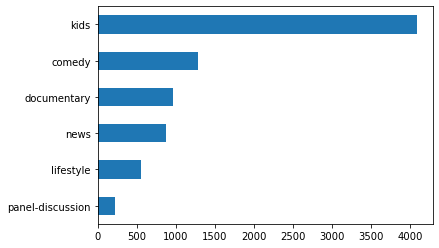

In [60]:
df_ABC.Category.value_counts().sort_values().plot(kind='barh');

In [62]:
df_ABC[df_ABC.Category=='comedy']

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres,0,Organic fertilizer producers and brothers are ...,100 Bloody Acres Organic fertilizer producers ...,False
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1,An Indigenous crew from a remote radio station...,8MMM An Indigenous crew from a remote radio st...,False
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex,0,About Sex invites teens to take a funny and fr...,About Sex About Sex invites teens to take a fu...,False
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,'MOVIES',comedy,Absolutely Anything,0,Aliens place the fate of humanity in the hands...,Absolutely Anything Aliens place the fate of h...,False
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen,0,A wickedly funny and surprisingly moving fable...,Accidents Happen A wickedly funny and surprisi...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1283,Peep Show,Mark faces the horror of having to face his es...,https://cdn.iview.abc.net.au/thumbs/i/zy/ZY985...,Mark and Jeremy are two very ordinary weirdos ...,"David Mitchell, Robert Webb",,comedy,Peep Show: Series 5 Episode 2 Spin War,0,Mark faces the horror of having to face his es...,Peep Show Mark faces the horror of having to f...,False
1284,Peep Show,Jeremy finally runs out of money and finds him...,https://cdn.iview.abc.net.au/thumbs/i/zy/ZY985...,Mark and Jeremy are two very ordinary weirdos ...,"David Mitchell, Robert Webb",,comedy,Peep Show: Series 5 Episode 3 Jeremy's Broke,0,Jeremy finally runs out of money and finds him...,Peep Show Jeremy finally runs out of money and...,False
1285,Peep Show,Jeremy's mother visits for a family funeral. H...,https://cdn.iview.abc.net.au/thumbs/i/zy/ZY985...,Mark and Jeremy are two very ordinary weirdos ...,"David Mitchell, Robert Webb",,comedy,Peep Show: Series 5 Episode 4 Jeremy's Mummy,0,Jeremy's mother visits for a family funeral. H...,Peep Show Jeremy's mother visits for a family ...,False
1286,Peep Show,Jeremy and Super Hans get a band manager and p...,https://cdn.iview.abc.net.au/thumbs/i/zy/ZY985...,Mark and Jeremy are two very ordinary weirdos ...,"David Mitchell, Robert Webb",,comedy,Peep Show: Series 5 Episode 5 Jeremy's Manager,0,Jeremy and Super Hans get a band manager and p...,Peep Show Jeremy and Super Hans get a band man...,False


# CLUSTER

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import string

list_description = df_ABC['cluster_input'].tolist()

# filter non-string plots 
list_description = [description for description in list_description if type(description) == str]

def preprocess(text):
    return text.translate(str.maketrans('', '', string.punctuation))

tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess, lowercase=True, stop_words='english') #preprocessing

tfidf = tfidf_vectorizer.fit_transform(list_description) #vectorizar 
#print(tfidf)

#kmeans = KMeans(n_clusters=11).fit(tfidf) #Se estan calculado los clusters

In [64]:
preprocess(list_description[5])

'Adam Josh and Alex are back for a brand new season of The Last Leg in 2022 celebrating 10 years looking at the lighter side of the weeks news Fasttracked from the UK Adam Hills Alex Brooker Josh Widdicombe COMEDY PANEL  DISCUSSION comedy Adam Hills The Last Leg'

# CLUSTER VISUALIZATION AND SENSITIVITY

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot(user_ratings, k):

        h = 0.2
        reduced_data = PCA(n_components=2).fit_transform(user_ratings)

        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(reduced_data)

        x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
        y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        plt.figure(1)
        plt.clf()
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = kmeans.cluster_centers_
        plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='r', zorder=10)
        plt.title('K-means clustering of the user')

C:\Users\njeri\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


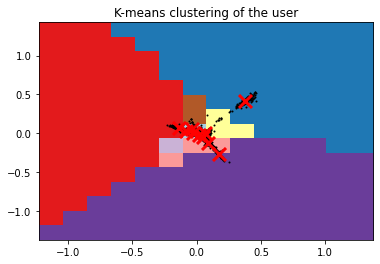

In [67]:
from scipy.sparse import dok_matrix

d_matrix = dok_matrix(tfidf).todense()

plot(user_ratings=d_matrix, k=10);

In [68]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [69]:
WSS_SCORE= calculate_WSS(d_matrix , 11)

C:\Users\njeri\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\njeri\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\njeri\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\njeri\anaconda3\lib\site-

In [70]:
WSS_SCORE

[2.2922150227608817,
 2.286779693397855,
 2.286974001864101,
 2.286942269946404,
 2.2808108689129334,
 2.278327307973814,
 2.2747840619878117,
 2.27525657599164,
 2.2716145097554286,
 2.272509360121001,
 2.2777007769987105]

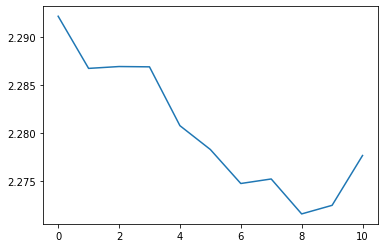

In [71]:
import matplotlib.pyplot as plt
plt.plot(WSS_SCORE)
plt.show();

In [72]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 12

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(tfidf)
  labels = kmeans.labels_
  sil.append(silhouette_score(tfidf, labels, metric = 'euclidean'))

In [73]:
sil

[0.004953001840337566,
 0.005603931349718297,
 0.005693981328070928,
 0.006956880297670007,
 0.008098494563633953,
 0.008745813516514482,
 0.009849634982004054,
 0.010794617888280709,
 0.01240472532219412,
 0.014462553656710713,
 0.014069182606696458]

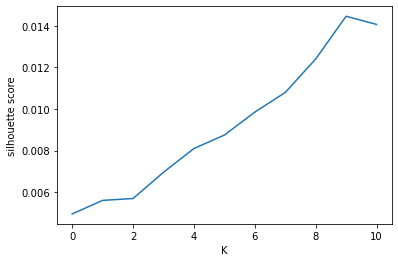

In [74]:
plt.plot(sil)
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show();

In [75]:
kmeans = KMeans(n_clusters=8).fit(tfidf) #Se estan calculado los clusters

In [76]:
df_ABC['Cluster'] = kmeans.labels_
df_ABC

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates,Cluster
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres,0,Organic fertilizer producers and brothers are ...,100 Bloody Acres Organic fertilizer producers ...,False,4
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1,An Indigenous crew from a remote radio station...,8MMM An Indigenous crew from a remote radio st...,False,4
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex,0,About Sex invites teens to take a funny and fr...,About Sex About Sex invites teens to take a fu...,False,4
3,Absolutely Anything,Aliens place the fate of humanity in the hands...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW287...,Aliens place the fate of humanity in the hands...,Terry Jones,'MOVIES',comedy,Absolutely Anything,0,Aliens place the fate of humanity in the hands...,Absolutely Anything Aliens place the fate of h...,False,0
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen,0,A wickedly funny and surprisingly moving fable...,Accidents Happen A wickedly funny and surprisi...,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,QI,Sandi Toksvig asks questions on animals beginn...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 19 Episode 13 R Animals,0,Sandi Toksvig asks questions on animals beginn...,QI Sandi Toksvig asks questions on animals beg...,False,0
7977,QI,"Bill Bailey, Jack Carroll and Olga Koch join r...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 19 Episode 14 Rogue,0,"Bill Bailey, Jack Carroll and Olga Koch join r...","QI Bill Bailey, Jack Carroll and Olga Koch joi...",False,0
7978,QI,Let Sandi Toksvig bring you to your senses wit...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 6 Sensational,0,Let Sandi Toksvig bring you to your senses wit...,QI Let Sandi Toksvig bring you to your senses ...,False,0
7979,QI,Sandi Toksvig hosts a specially spooky episode...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,,panel-discussion,QI: Series 20 Episode 7 Spooky,0,Sandi Toksvig hosts a specially spooky episode...,QI Sandi Toksvig hosts a specially spooky epis...,False,0


In [77]:
df_ABC.Cluster.value_counts()

1    3142
0    2219
4    1092
3     599
2     376
7     272
6     176
5     105
Name: Cluster, dtype: int64

In [78]:
df_ABC[(df_ABC['Cluster']==4)]

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates,Cluster
0,100 Bloody Acres,Organic fertilizer producers and brothers are ...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,Organic fertilizer producers and brothers are ...,"Colin Caires, Cameron Cairnes","'COMEDY', 'DRAMA', 'MOVIES'",comedy,100 Bloody Acres,0,Organic fertilizer producers and brothers are ...,100 Bloody Acres Organic fertilizer producers ...,False,4
1,8MMM,An Indigenous crew from a remote radio station...,https://cdn.iview.abc.net.au/thumbs/i/ip/IP133...,An Indigenous crew from a remote radio station...,"Ian Meadows, Shari Sebbens, Geoff Morrell, Tri...",'INDIGENOUS',comedy,8MMM,1,An Indigenous crew from a remote radio station...,8MMM An Indigenous crew from a remote radio st...,False,4
2,About Sex,About Sex invites teens to take a funny and fr...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW282...,About Sex invites teens to take a funny and fr...,"Brittany Drisdelle, Nadine Bhabha, Mike Carrozza",'SCIENCE',comedy,About Sex,0,About Sex invites teens to take a funny and fr...,About Sex About Sex invites teens to take a fu...,False,4
4,Accidents Happen,A wickedly funny and surprisingly moving fable...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...,A wickedly funny and surprisingly moving fable...,Andrew Lancaster,"'COMEDY', 'DRAMA', 'MOVIES'",comedy,Accidents Happen,0,A wickedly funny and surprisingly moving fable...,Accidents Happen A wickedly funny and surprisi...,False,4
5,Adam Hills: The Last Leg,"Adam, Josh and Alex are back for a brand new s...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW324...,"Adam, Josh and Alex are back for a brand new s...","Adam Hills, Alex Brooker, Josh Widdicombe","'COMEDY', 'PANEL & DISCUSSION'",comedy,Adam Hills: The Last Leg,0,"Adam, Josh and Alex are back for a brand new s...","Adam Hills: The Last Leg Adam, Josh and Alex a...",False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,Gruen Pitch,"This week, The Pitch is to either save the art...",https://cdn.iview.abc.net.au/thumbs/i/lr/LR202...,The Pitch take us into the thinking of the peo...,Wil Anderson,'PANEL & DISCUSSION',panel-discussion,Gruen Pitch: Series 12 Episode 6,0,"This week, The Pitch is to either save the art...","Gruen Pitch This week, The Pitch is to either ...",False,4
7901,Gruen Pitch,"This week, The Pitch to rehabilitate or elimin...",https://cdn.iview.abc.net.au/thumbs/i/lr/LR202...,The Pitch take us into the thinking of the peo...,Wil Anderson,'PANEL & DISCUSSION',panel-discussion,Gruen Pitch: Series 12 Episode 7,0,"This week, The Pitch to rehabilitate or elimin...","Gruen Pitch This week, The Pitch to rehabilita...",False,4
7902,Gruen Pitch,"This week, The Pitch to make us ditch or love ...",https://cdn.iview.abc.net.au/thumbs/i/lr/LR202...,The Pitch take us into the thinking of the peo...,Wil Anderson,'PANEL & DISCUSSION',panel-discussion,Gruen Pitch: Series 12 Episode 8,0,"This week, The Pitch to make us ditch or love ...","Gruen Pitch This week, The Pitch to make us di...",False,4
7903,Gruen Pitch,"This week, The Pitch from advertising's Youngb...",https://cdn.iview.abc.net.au/thumbs/i/lr/LR202...,The Pitch take us into the thinking of the peo...,Wil Anderson,'PANEL & DISCUSSION',panel-discussion,Gruen Pitch: Series 12 Episode 9,0,"This week, The Pitch from advertising's Youngb...","Gruen Pitch This week, The Pitch from advertis...",False,4


In [79]:
## Create an ID ##
ids = range(1, len(df_ABC['Series']))
df_ABC['ID'] = ids

623


In [80]:
print(df_ABC.ID.nunique())

623


In [36]:
import re
regex_s = re.compile('Series ([0-9]*)')
regex_e = re.compile('Episode ([0-9]*)')

6


In [37]:
series = []
episode = []

regex_s = re.compile('Series ([0-9]*)')
regex_e = re.compile('Episode ([0-9]*)')

for show in df_ABC.Series:
    if regex_s.findall(show):
        series.append(', '.join(regex_s.findall(show)))
    else: series.append('')

        
for show in df_ABC.Series:
    if regex_e.findall(show):
        episode.append(', '.join(regex_e.findall(test)))
    else: episode.append('')
       

In [38]:
print(series)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '1', '1', '1', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '

In [30]:
print(len(episode))

7981


In [31]:
print(len(df_ABC.Series))

7981


In [39]:
df_ABC['Season'] = series
df_ABC['Episode'] = episode

In [40]:
df_ABC.tail(10)

,title,description,image,description_2,director,Features,Category,Series,diversity,cluster_input,duplicated_detect,duplicates,Cluster,ID,Season,Episode
7971,QI,Stephen Fry hosts the quiz show in which the a...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW016...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 13 Ladies And Gentlemen,0,Stephen Fry hosts the quiz show in which the a...,QI Stephen Fry hosts the quiz show in which th...,False,0,QISandi Toksvigpanel-discussion,13,
7972,QI,Stephen Fry seeks out the truth about liars an...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW016...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 13 Lying,0,Stephen Fry seeks out the truth about liars an...,QI Stephen Fry seeks out the truth about liars...,False,0,QISandi Toksvigpanel-discussion,13,
7973,QI,Sandi Toksvig tunes in for a bit of 'Radio' ac...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 19 Episode 9 Radioactive,0,Sandi Toksvig tunes in for a bit of 'Radio' ac...,QI Sandi Toksvig tunes in for a bit of 'Radio'...,False,0,QISandi Toksvigpanel-discussion,19,6
7974,QI,Sandi Toksvig indulges in a bit of well-earned...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 19 Episode 10 Rest and Recreation,0,Sandi Toksvig indulges in a bit of well-earned...,QI Sandi Toksvig indulges in a bit of well-ear...,False,0,QISandi Toksvigpanel-discussion,19,6
7975,QI,Sandi Toksvig asks questions on the theme of r...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 19 Episode 11 Roaming,0,Sandi Toksvig asks questions on the theme of r...,QI Sandi Toksvig asks questions on the theme o...,False,0,QISandi Toksvigpanel-discussion,19,6
7976,QI,Sandi Toksvig asks questions on animals beginn...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 19 Episode 13 R Animals,0,Sandi Toksvig asks questions on animals beginn...,QI Sandi Toksvig asks questions on animals beg...,False,0,QISandi Toksvigpanel-discussion,19,6
7977,QI,"Bill Bailey, Jack Carroll and Olga Koch join r...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW254...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 19 Episode 14 Rogue,0,"Bill Bailey, Jack Carroll and Olga Koch join r...","QI Bill Bailey, Jack Carroll and Olga Koch joi...",False,0,QISandi Toksvigpanel-discussion,19,6
7978,QI,Let Sandi Toksvig bring you to your senses wit...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 20 Episode 6 Sensational,0,Let Sandi Toksvig bring you to your senses wit...,QI Let Sandi Toksvig bring you to your senses ...,False,0,QISandi Toksvigpanel-discussion,20,6
7979,QI,Sandi Toksvig hosts a specially spooky episode...,https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 20 Episode 7 Spooky,0,Sandi Toksvig hosts a specially spooky episode...,QI Sandi Toksvig hosts a specially spooky epis...,False,0,QISandi Toksvigpanel-discussion,20,6
7980,QI,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...",https://cdn.iview.abc.net.au/thumbs/i/zw/ZW321...,Sandi Toksvig hosts the return of the quiz wit...,Sandi Toksvig,NaN,panel-discussion,QI: Series 20 Episode 9 'S' Animals,0,"Join Sandi Toksvig, Alan Davies, Cally Beaton,...","QI Join Sandi Toksvig, Alan Davies, Cally Beat...",False,0,QISandi Toksvigpanel-discussion,20,6


In [42]:
df_ABC.to_csv('df_recommen_ABC.csv', index=False)

In [87]:
df_ABC[df_ABC['ID'] == '100 Bloody AcresColin Caires, Cameron Cairnescomedy'].iloc[0]

title                                                 100 Bloody Acres
description          Organic fertilizer producers and brothers are ...
image                https://cdn.iview.abc.net.au/thumbs/i/zw/ZW297...
description_2        Organic fertilizer producers and brothers are ...
director                                 Colin Caires, Cameron Cairnes
Features                                   'COMEDY', 'DRAMA', 'MOVIES'
Category                                                        comedy
Series                                                100 Bloody Acres
diversity                                                            0
cluster_input        Organic fertilizer producers and brothers are ...
duplicated_detect    100 Bloody Acres Organic fertilizer producers ...
duplicates                                                       False
Cluster                                                              4
ID                   100 Bloody AcresColin Caires, Cameron Cairnesc...
Name: 